# Introduction to Pandas

In [1]:
import numpy as np
import pandas as pd

### Series
- indexed numpy array

In [5]:
s = pd.Series((1,2,3,4,5))
s1 = pd.Series((1,2,3,4,5), index = ("a","b","c","d","e"), name="Col1")
(s.values, s.index, s1.values, s1.index)

(array([1, 2, 3, 4, 5], dtype=int64),
 RangeIndex(start=0, stop=5, step=1),
 array([1, 2, 3, 4, 5], dtype=int64),
 Index(['a', 'b', 'c', 'd', 'e'], dtype='object'))

In [6]:
s1

a    1
b    2
c    3
d    4
e    5
Name: Col1, dtype: int64

In [8]:
#what worked for numpy works here as well
(s1.sum(), s1.median())

(15, 3.0)

In [9]:
# can be easily transformed to/fro python dictionary (but looses explicit ordering in the process)
dict(s1)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}

In [10]:
# explicit ordering? try reindexing
s1.reindex(["e","d","a","b","c"]) # note copy and/or inplace parameters!!!

e    5
d    4
a    1
b    2
c    3
Name: Col1, dtype: int64

In [11]:
#why is indexing cool? 
# - you can slice based on them
# - operations are made index-wise
s1[["a","c"]]

a    1
c    3
Name: Col1, dtype: int64

In [19]:
s2 = pd.Series((1,2,3,4,5), index = ("a","b","c","x","y"), name="Col2")
s1+s2

a    2.0
b    4.0
c    6.0
d    NaN
e    NaN
x    NaN
y    NaN
dtype: float64

### Data frames
- a.k.a. database tables or excel tables

In [21]:
df1 = pd.DataFrame(data=np.random.rand(10,2), columns=["Col1","Col2"])
df1.head() #df1.tail(50)

Col1      Col2
0  0.064979  0.770544
1  0.010179  0.371208
2  0.939603  0.087904
3  0.032229  0.791547
4  0.064603  0.678238

In [30]:
#dataframe can be created from many things, e.g. dictionary of series
frame = { 'Col2': s1, 'Col3': s2 }
df2 = pd.DataFrame(frame)
df2

Col2  Col3
a   1.0   1.0
b   2.0   2.0
c   3.0   3.0
d   4.0   NaN
e   5.0   NaN
x   NaN   4.0
y   NaN   5.0

In [42]:
# you can merge frames in several ways, see https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
mergedDF = pd.concat([df1,df2])
mergedDF

Col1      Col2  Col3
0  0.064979  0.770544   NaN
1  0.010179  0.371208   NaN
2  0.939603  0.087904   NaN
3  0.032229  0.791547   NaN
4  0.064603  0.678238   NaN
5  0.981261  0.951827   NaN
6  0.419333  0.863026   NaN
7  0.944165  0.648321   NaN
8  0.757887  0.264022   NaN
9  0.436284  0.708493   NaN
a       NaN  1.000000   1.0
b       NaN  2.000000   2.0
c       NaN  3.000000   3.0
d       NaN  4.000000   NaN
e       NaN  5.000000   NaN
x       NaN       NaN   4.0
y       NaN       NaN   5.0

In [43]:
s3 = pd.Series(("a","b","c"), index=[2,3,4])
mergedDF["s3_col"] = s3
mergedDF.head(6)

Col1      Col2  Col3 s3_col
0  0.064979  0.770544   NaN    NaN
1  0.010179  0.371208   NaN    NaN
2  0.939603  0.087904   NaN      a
3  0.032229  0.791547   NaN      b
4  0.064603  0.678238   NaN      c
5  0.981261  0.951827   NaN    NaN

In [44]:
mergedDF.mean()

Col1    0.465052
Col2    1.409009
Col3    3.000000
dtype: float64

In [45]:
mergedDF.fillna(0, inplace=True)
mergedDF.describe()#works for numeric by default

Col1       Col2       Col3
count  17.000000  17.000000  17.000000
mean    0.273560   1.243243   0.882353
std     0.388514   1.440323   1.615640
min     0.000000   0.000000   0.000000
25%     0.000000   0.371208   0.000000
50%     0.032229   0.770544   0.000000
75%     0.436284   1.000000   1.000000
max     0.981261   5.000000   5.000000

In [46]:
mergedDF.s3_col.describe()#for nominal if only nominal present

count     17
unique     4
top        0
freq      14
Name: s3_col, dtype: int64

In [54]:
#database-style joins
left = pd.DataFrame(np.arange(1,6), columns=["id_a"])
right = pd.DataFrame(np.arange(3,10), columns=["id_b"])

left["anotherColumn"] = ["a","b","c","d","e"]
right["anotherColumn"] = ["a","b","c","d","e","f","g"]
left

id_a anotherColumn
0     1             a
1     2             b
2     3             c
3     4             d
4     5             e

In [60]:
both = pd.merge(left,right,left_on="id_a", right_on="id_b", how="outer") 
#works on indexes or columns with the same names as well
both

id_a anotherColumn_x  id_b anotherColumn_y
0   1.0               a   NaN             NaN
1   2.0               b   NaN             NaN
2   3.0               c   3.0               a
3   4.0               d   4.0               b
4   5.0               e   5.0               c
5   NaN             NaN   6.0               d
6   NaN             NaN   7.0               e
7   NaN             NaN   8.0               f
8   NaN             NaN   9.0               g

### split-apply-combine (Group by)
- https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [66]:
both.fillna(0, inplace=True)
both.loc[2:4, "id_a"] = 2 
#another access method is .iloc -> use numeric indexes 0..n instead of the defined ones (both.iloc[2:4, 0])
both.loc[3:6, "id_b"] = 5
both

id_a anotherColumn_x  id_b anotherColumn_y
0   1.0               a   0.0               0
1   2.0               b   0.0               0
2   2.0               c   3.0               a
3   2.0               d   5.0               b
4   2.0               e   5.0               c
5   0.0               0   5.0               d
6   0.0               0   5.0               e
7   0.0               0   8.0               f
8   0.0               0   9.0               g

In [65]:
both.groupby('id_a').count()

anotherColumn_x  id_b  anotherColumn_y
id_a                                        
0.0                 4     4                4
1.0                 1     1                1
2.0                 4     4                4

In [67]:
both.groupby(['id_a', "id_b"]).count() #this creates a multiindex

anotherColumn_x  anotherColumn_y
id_a id_b                                  
0.0  5.0                 2                2
     8.0                 1                1
     9.0                 1                1
1.0  0.0                 1                1
2.0  0.0                 1                1
     3.0                 1                1
     5.0                 2                2

In [73]:
gb = both.groupby('id_a')[["id_b"]].agg([np.sum, np.mean, np.std])
gb

id_b                
       sum  mean       std
id_a                      
0.0   27.0  6.75  2.061553
1.0    0.0  0.00       NaN
2.0   13.0  3.25  2.362908

In [74]:
gb.columns

MultiIndex([('id_b',  'sum'),
            ('id_b', 'mean'),
            ('id_b',  'std')],
           )

### Dummy values / one-hot encoding (nominal attribute to the list of binary features)
- various similarity metrics, deep learning etc. works with one-hot (k-hot) encoded inputs
- how to measure cosine similarity between two objects with several attributes, some being nominal?

In [78]:
pd.get_dummies(both[["anotherColumn_x","anotherColumn_y"]])


anotherColumn_x_0  anotherColumn_x_a  anotherColumn_x_b  anotherColumn_x_c  \
0                  0                  1                  0                  0   
1                  0                  0                  1                  0   
2                  0                  0                  0                  1   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   
5                  1                  0                  0                  0   
6                  1                  0                  0                  0   
7                  1                  0                  0                  0   
8                  1                  0                  0                  0   

   anotherColumn_x_d  anotherColumn_x_e  anotherColumn_y_0  anotherColumn_y_a  \
0                  0                  0                  1                  0   
1                  0                  0                  1                  0   
2                  0                  0                  0                  1   
3                  1                  0                  0                  0   
4                  0                  1                  0                  0   
5                  0                  0                  0                  0   
6                  0                  0                  0                  0   
7                  0                  0                  0                  0   
8                  0                  0                  0                  0   

   anotherColumn_y_b  anotherColumn_y_c  anotherColumn_y_d  anotherColumn_y_e  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  1                  0                  0                  0   
4                  0                  1                  0                  0   
5                  0                  0                  1                  0   
6                  0                  0                  0                  1   
7                  0                  0                  0                  0   
8                  0                  0                  0                  0   

   anotherColumn_y_f  anotherColumn_y_g  
0                  0                  0  
1                  0                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0  
5                  0                  0  
6                  0                  0  
7                  1                  0  
8                  0                  1

### Basic plots
- encapsulates matplotlib (we'll talk about it later)

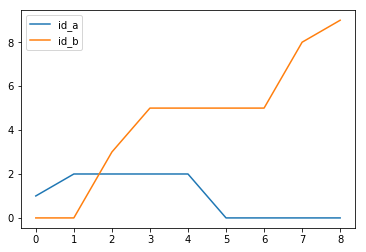

In [80]:
%matplotlib inline
both[["id_a","id_b"]].plot()

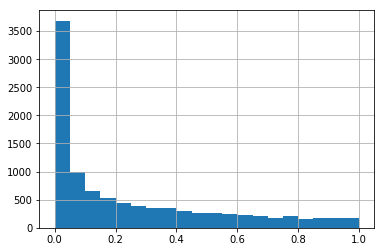

In [90]:
pd.Series(np.random.rand(10000)**3).hist(bins=20,range=(0,1))